In [102]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
#mport tensorflow as tf
import numpy as np

In [103]:
df = pd.read_csv("ex1data1.txt", names = ['Population', 'Profit'])

In [104]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Visualizing the Original Dataset
- For practice reason, the following problem solving steps I may complete multiple time with different tools
  - like I may visualizing the same target with either seaborn and matplotlib

<IPython.core.display.Javascript object>


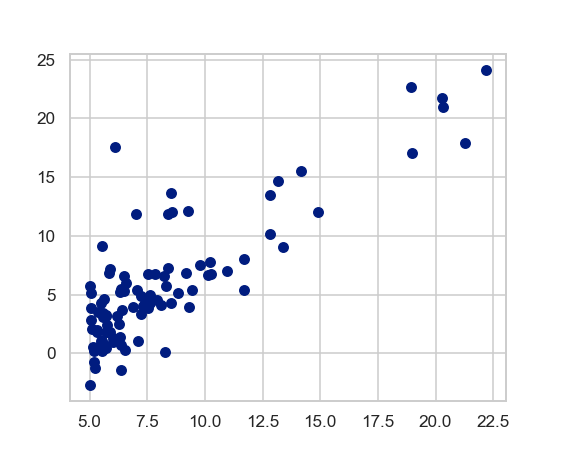

In [178]:
fig, ax = plt.subplots(figsize = (5, 4))
plt.scatter(df.Population, df.Profit)
plt.show()

In [107]:
def computeCost(X, y, theta):
    inner = np.power((X * theta.T - y), 2)
    return np.sum(inner) / (2 * len(X))

# to obtain X
X = df.iloc[:, 0]
X

ones = pd.DataFrame({"x0": np.ones(len(X))})

X = pd.concat([ones, X], axis = 1)

y = df.iloc[:, 1:]

print(type(y))

# note we use numpy for computing cost function, hence we need numpy matrix as parameter, thus
X = np.matrix(X.values)
y = np.matrix(y.values)

# initialize theta

theta = np.matrix([[0, 0]])

# check dimension

X.shape, theta.shape, y.shape



<class 'pandas.core.frame.DataFrame'>


((97, 2), (1, 2), (97, 1))

In [108]:
computeCost(X, y, theta)

32.072733877455676

In [109]:
# batch gradiant descent
alpha = 0.01
iters = 1000
theta = theta.T
def gradientDescent(X, y, theta, alpha, iters):
    cost = []
    for times in range(iters):
        gradient = 1/len(X) * X.T@(X@(theta) -y)
        theta = theta - alpha * gradient
        cost.append(computeCost(X, y, theta.T))
    return theta, cost

theta, cost = gradientDescent(X, y, theta, alpha, iters)

print(theta)

computeCost(X, y, theta.T)

[[-3.24140214]
 [ 1.1272942 ]]


4.515955503078914

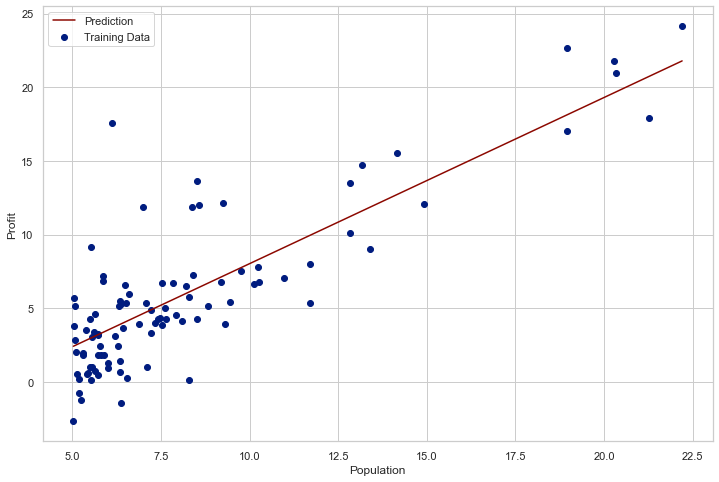

In [110]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)

f = theta[0, 0] +  theta[1, 0] * x # note theta is a matrix

#print(f, x)

fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label = 'Training Data')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc = 2)
plt.show()

$$2/m * (X\theta - y) ^ T (X\theta -y)$$

the derivative is 

$$ 2/m * X^T(X\theta - y) $$

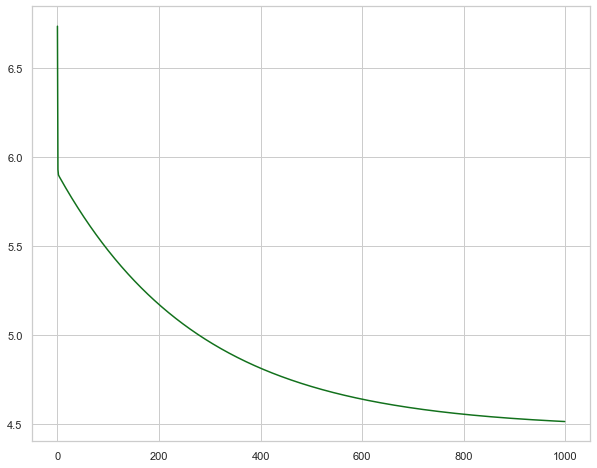

In [111]:
# map the gradient descent cost function

fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(range(iters), cost, 'g')


In [128]:
# another example with multiple featues

df2 = pd.read_csv('ex1data2.txt', header = None, names = ['Size', 'Bedrooms', 'Price'])
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [129]:
# normalize the data

df2 = (df2 - df2.mean())/df2.std()
df2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


0.13070336960771892


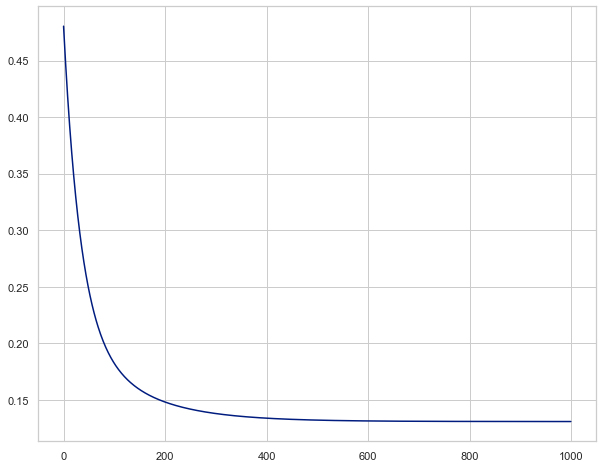

In [137]:
# let's find X, y, and initialize a theta
# we'll set y being the price, then X includes the two features, Size and Bedrooms
X2 = df2.iloc[:, 0:2]
const_col = pd.DataFrame({"x0": np.ones(len(X))})
X2 = pd.concat([const_col, X2], axis = 1)

y2 = df2.iloc[:, df2.shape[1] - 1:]

theta = np.array([0, 0])

X2 = np.matrix(X)
y2 = np.matrix(y)
theta = np.matrix([0, 0, 0])
cost1 = []
theta, cost1 = gradientDescent(X2, y2, theta.T, alpha, iters)


fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(range(iters), cost1)
plt.show()

print(computeCost(X2,y2,theta.T))

In [138]:
# use sklearn to fit a linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X2, y2)
model.coef_, theta

model_theta = np.matrix(model.coef_.ravel())

computeCost(X2, y2, model_theta)


0.13068648053904197

Note that the coefficients come from linear regression and the one from gradient descent differs.
This is because that the coefficients are derived from the global minimum, whereas our gradient descent only looks for the local minimum that is closest to our initial theta

<IPython.core.display.Javascript object>


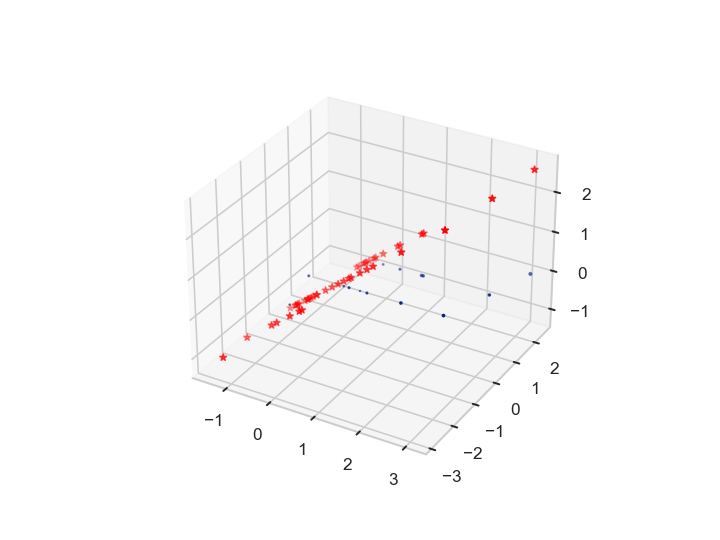

In [170]:
# with sklearn model coefficients
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

regression_graph3d = fig.add_subplot(1,1,1,projection = '3d')

plt.scatter(df2.Size, df2.Bedrooms, df2.Price)

predicted_price = model.predict(X2).flatten()

regression_graph3d.scatter(df2.Size, df2.Bedrooms, predicted_price, marker = '*', color = 'red')




<IPython.core.display.Javascript object>


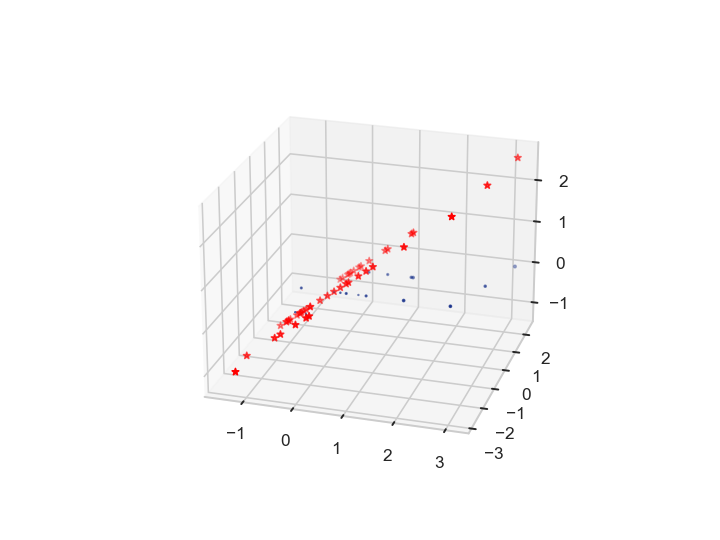

In [169]:
# with gradient descent algo coefficients
theta

predicted_price_with_gd = theta[0,0] + theta[1, 0] * df2.Size + theta[2, 0] * df2.Bedrooms 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

regression_graph3d = fig.add_subplot(1,1,1,projection = '3d')

plt.scatter(df2.Size, df2.Bedrooms, df2.Price)

predicted_price = model.predict(X2).flatten()

regression_graph3d.scatter(df2.Size, df2.Bedrooms, predicted_price_with_gd, marker = '*', color = 'red')


